# Exam 2014 Q3

In [1]:
import sympy as sp
sp.init_printing()
import numpy as np

In [2]:
## 1

A = sp.Matrix([
    [1,-2,2,6],
    [2,-3,4,9]
])
A

⎡1  -2  2  6⎤
⎢           ⎥
⎣2  -3  4  9⎦

In [3]:
b = sp.Matrix([-6,-8])
b

⎡-6⎤
⎢  ⎥
⎣-8⎦

In [4]:
# 1. 

Ab = A.row_join(b)
Ab.rref()[0]

⎡1  0  2  0   2⎤
⎢              ⎥
⎣0  1  0  -3  4⎦

In [11]:
Anul = A.nullspace()

x1,x2,x3,x4 = sp.symbols("x1,x2,x3,x4")
x = sp.Matrix([x1,x2,x3,x4])
sp.Eq(x, sp.Matrix([2,4,0,0])+x3*Anul[0]+x4*Anul[1])

⎡x₁⎤   ⎡-2⋅x₃ + 2⎤
⎢  ⎥   ⎢         ⎥
⎢x₂⎥   ⎢3⋅x₄ + 4 ⎥
⎢  ⎥ = ⎢         ⎥
⎢x₃⎥   ⎢   x₃    ⎥
⎢  ⎥   ⎢         ⎥
⎣x₄⎦   ⎣   x₄    ⎦

In [18]:
# Cannot seperate into vectors due to stupid math program, sorry

### 2

- $B^2B^TBB^{-1}(B^{-1})^TB(B^{-1})^2$
  - Original

- $B^2B^TI(B^{-1})^TB(B^{-1})^2$
  - $BB^{-1} = I$

- $B^2B^T(B^{-1})^TB(B^{-1})^2$
  - $I$ removed

- $B^2B^T(B^T)^{-1}B(B^{-1})^2$
  - $(B^{-1})^T = (B^T)^{-1}$

- $B^2IB(B^{-1})^2$
  - $BB^{-1} = I$

- $B^2B(B^{-1})^2$
  - $I$ removed

- $B^2IIB^{-1}$
  - $BB^{-1} = I$

- $B^2B^{-1}$
  - $I$ removed

- $B$
  - $BB^{-1} = I$

In [19]:
# 2

q = sp.symbols("q")

A = sp.Matrix([
    [3-2*q, 1],
    [4,3+2*q]
])
A

⎡-2⋅q + 3     1   ⎤
⎢                 ⎥
⎣   4      2⋅q + 3⎦

In [25]:
# 1 calculate q so that

A2 = A**2
A2

⎡          2                    ⎤
⎢(-2⋅q + 3)  + 4        6       ⎥
⎢                               ⎥
⎢                          2    ⎥
⎣      24         (2⋅q + 3)  + 4⎦

In [45]:
# Which gives two equations

e1 = sp.Eq(A2[0,0]-4,25)
e1

In [46]:
e2 = sp.Eq(A2[1,1]-4, 121)
e2

In [47]:
sp.solveset(e1,q).evalf()

In [48]:
sp.solveset(e2,q).evalf()

In [49]:
# As 4 is the only constant it is the answer to both equations

In [52]:
q = 4
A.subs({"q":4})

⎡-5  1 ⎤
⎢      ⎥
⎣4   11⎦

In [53]:
A.subs({"q":4})**2

⎡29   6 ⎤
⎢       ⎥
⎣24  125⎦

## 3

In [54]:
A = sp.Matrix([
    [4,5,7],
    [8,10,14],
    [4,5,7],
    [12,20,16]
])
A

⎡4   5   7 ⎤
⎢          ⎥
⎢8   10  14⎥
⎢          ⎥
⎢4   5   7 ⎥
⎢          ⎥
⎣12  20  16⎦

In [60]:
# 1

# Determine Col A
A.rref()[1] # Reduced to echelon form and check which columns hold a pivot, sympy gives this information freely

In [61]:
# The pivots are in col 1, 2

In [62]:
ColA = [A[:,0], A[:,1]]
ColA

⎡⎡4 ⎤  ⎡5 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢8 ⎥  ⎢10⎥⎥
⎢⎢  ⎥, ⎢  ⎥⎥
⎢⎢4 ⎥  ⎢5 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣12⎦  ⎣20⎦⎦

In [63]:
A.columnspace() # Control

⎡⎡4 ⎤  ⎡5 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢8 ⎥  ⎢10⎥⎥
⎢⎢  ⎥, ⎢  ⎥⎥
⎢⎢4 ⎥  ⎢5 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣12⎦  ⎣20⎦⎦

In [68]:
# 2

a1, a2 = A.columnspace()

a1.dot(a2)

In [69]:
# They aren't orthogonal from the get go
u1 = a1
u1

⎡4 ⎤
⎢  ⎥
⎢8 ⎥
⎢  ⎥
⎢4 ⎥
⎢  ⎥
⎣12⎦

In [70]:
# From the base vector form the orthogonal pair for a2
u2 = a2-a2.dot(u1)/u1.dot(u1)*u1
u2

⎡-1⎤
⎢  ⎥
⎢-2⎥
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣2 ⎦

In [71]:
u1.dot(u2)

In [72]:
# 3

b = sp.Matrix([2,2,2,2])
b

⎡2⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣2⎦

In [73]:
bhat = b.dot(u1)/u1.dot(u1)*u1+b.dot(u2)/u2.dot(u2)*u2
bhat

⎡4/3⎤
⎢   ⎥
⎢8/3⎥
⎢   ⎥
⎢4/3⎥
⎢   ⎥
⎣ 2 ⎦

In [103]:
## 4

xa = sp.Matrix([2,4,6])
ya = sp.Matrix([1,2,7])

In [114]:
def y(x):
    a0,a1,a2,b0,b1,b2 = sp.symbols("a0,a1,a2,b0,b1,b2")
    
    if x == 4:
        return (a0+a1*x+a2*x**2, b0+b1*x+b2*x**2)
    if x >= 2 and x < 4:
        return a0+a1*x+a2*x**2
    elif x > 4 and x <= 6:
        return b0+b1*x+b2*x**2
    
xs = sp.symbols("x")

# 1.

sp.Eq(sp.Derivative(y(2),xs).doit(),0)

In [123]:
sp.Derivative(y(2),xs)

In [116]:
sp.Eq(y(xa[0]),ya[0])

In [120]:
ex1, ex2 = y(xa[1])

sp.Eq(ex1,ya[1])

In [121]:
sp.Eq(ex2,ya[1])

In [118]:
sp.Eq(y(xa[2]),ya[2])

In [135]:
sp.Eq(ex1, ex2)

In [137]:
sp.Eq(ex1-ex2,0)

In [144]:
A = sp.Matrix([
    [1,2,4,0,0,0],
    [1,4,16,0,0,0],
    [0,0,0,1,4,16],
    [0,0,0,1,6,36],
    [0,1,8,0,-1,-8],
    [0,1,4,0,0,0]
])
A

⎡1  2  4   0  0   0 ⎤
⎢                   ⎥
⎢1  4  16  0  0   0 ⎥
⎢                   ⎥
⎢0  0  0   1  4   16⎥
⎢                   ⎥
⎢0  0  0   1  6   36⎥
⎢                   ⎥
⎢0  1  8   0  -1  -8⎥
⎢                   ⎥
⎣0  1  4   0  0   0 ⎦

In [145]:
b = sp.Matrix([1,2,2,7,0,0])
b

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢2⎥
⎢ ⎥
⎢7⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [146]:
Ab = A.row_join(b)
Ab

⎡1  2  4   0  0   0   1⎤
⎢                      ⎥
⎢1  4  16  0  0   0   2⎥
⎢                      ⎥
⎢0  0  0   1  4   16  2⎥
⎢                      ⎥
⎢0  0  0   1  6   36  7⎥
⎢                      ⎥
⎢0  1  8   0  -1  -8  0⎥
⎢                      ⎥
⎣0  1  4   0  0   0   0⎦

In [147]:
Ab.rref()[0]

⎡1  0  0  0  0  0   2 ⎤
⎢                     ⎥
⎢0  1  0  0  0  0  -1 ⎥
⎢                     ⎥
⎢0  0  1  0  0  0  1/4⎥
⎢                     ⎥
⎢0  0  0  1  0  0  10 ⎥
⎢                     ⎥
⎢0  0  0  0  1  0  -5 ⎥
⎢                     ⎥
⎣0  0  0  0  0  1  3/4⎦

In [159]:
x = Ab.rref()[0][:,6]
x

⎡ 2 ⎤
⎢   ⎥
⎢-1 ⎥
⎢   ⎥
⎢1/4⎥
⎢   ⎥
⎢10 ⎥
⎢   ⎥
⎢-5 ⎥
⎢   ⎥
⎣3/4⎦

In [182]:
a0,a1,a2,b0,b1,b2 = x.tolist()
a0 = a0[0]
a1 = a1[0]
a2 = a2[0]
b0 = b0[0]
b1 = b1[0]
b2 = b2[0]

AttributeError: 'Symbol' object has no attribute 'tolist'

In [183]:
x = sp.symbols("x")

yx1 = a0+a1*x+a2*x**2
yx2 = b0+b1*x+b2*x**2

In [184]:
yx1

In [185]:
yx2

In [186]:
plot1 = sp.plot(yx1,(x, 2, 4), show=False)
plot2 = sp.plot(yx2,(x, 4, 6), show=False)

In [187]:
plot1.append(plot2[0])

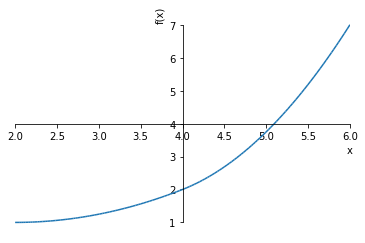

In [188]:
plot1.show()

In [190]:
# 5

# since x(k+1) = Ax(k)
# x(k) = A^k(0)
# As we are given two eigen values of a 2x2 diagonal matrix
# 1 
# x(k) = A^kx(0) = PDP^-1 * ... * PDP^-1x(0)
#      = PD^kP^-1x(0)
# D^k = 
l1,l2,k = sp.symbols("lambda_1 lambda_2 k")
Dk = sp.diag(l1,l2)**k
Dk

⎡  k     ⎤
⎢λ₁    0 ⎥
⎢        ⎥
⎢       k⎥
⎣ 0   λ₂ ⎦

In [191]:
# a

Dk.subs({
    l1: 1/2,
    l2: -1/2
})

⎡   k       ⎤
⎢0.5     0  ⎥
⎢           ⎥
⎢          k⎥
⎣ 0    -0.5 ⎦

In [196]:
sp.Limit(Dk.subs({
    l1: 1/2,
    l2: -1/2
}), k,sp.oo)

    ⎡   k       ⎤
    ⎢0.5     0  ⎥
lim ⎢           ⎥
k─→∞⎢          k⎥
    ⎣ 0    -0.5 ⎦

In [203]:
sp.Limit(Dk.subs({
    l1: 1/2,
    l2: -1/2
}), k,sp.oo)

    ⎡   k       ⎤
    ⎢0.5     0  ⎥
lim ⎢           ⎥
k─→∞⎢          k⎥
    ⎣ 0    -0.5 ⎦

In [206]:
sp.Limit(1/2**k, k,sp.oo).doit()

In [207]:
sp.Limit(-1/2**k, k,sp.oo).doit()

In [ ]:
# x(k) will go to 0 

In [208]:
# b

sp.Limit(Dk.subs({
    l1: 1,
    l2: 1
}), k,sp.oo)

    ⎡1  0⎤
lim ⎢    ⎥
k─→∞⎣0  1⎦

In [209]:
sp.Limit(1**k, k,sp.oo).doit()

In [210]:
sp.Limit(1**k, k,sp.oo).doit()

In [220]:
# x(k) = x(0) for all k

In [217]:
# c
sp.Limit(Dk.subs({
    l1: 2,
    l2: 2
}), k,sp.oo)

    ⎡ k    ⎤
    ⎢2   0 ⎥
lim ⎢      ⎥
k─→∞⎢     k⎥
    ⎣0   2 ⎦

In [218]:
sp.Limit(2**k, k,sp.oo).doit()

In [219]:
sp.Limit(2**k, k,sp.oo).doit()

In [221]:
# x(k) will diverge towards infinity

In [222]:
## 6
x = sp.symbols("x")
interval = (x, 0,1)
interval

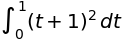

In [230]:
def p1(t):
    return 1 + t
def p2(t):
    return 2+t**2

def innerproduct(f,g,interval):
    return sp.Integral(f*g, interval)

# 1

t = sp.symbols("t")
interval = (t,0,1)

p1norm = innerproduct(p1(t),p1(t),interval)
p1norm

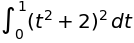

In [231]:
p2norm = innerproduct(p2(t),p2(t),interval)
p2norm

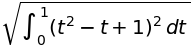

In [235]:
p1p2dist = sp.sqrt(innerproduct(p2(t)-p1(t),p2(t)-p1(t),interval))
p1p2dist

In [237]:
p1p2dist.doit().evalf()

In [239]:
# 2
sp.sqrt(innerproduct(p1(t),p2(t),interval)) <= p1norm*p2norm